# Logistic Regression 

Linear Regression works with number as labels we want to describe, here, our labels are categorical, that's means, the output is group of words, sometimes binaries, and other times classes.

When we work with classes, the output is going to be a percentage, of how sure we are that the input belongs to that specific output.

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [25]:
## PREPROCESSING

# Load the database from file census.csv
data = read_csv('../databases/census.csv')
print(data['income'].unique())
data.head()

[' <=50K' ' >50K']


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
# We will need to make a transformation on the income column,
# instead of using >50K or <=50K, we will use 1 and 0.
def convert(label):
    if label == ' >50K':
        return 1
    else:
        return 0

data['income'] = data['income'].apply(convert)

print(data['income'].unique())
data.head()

[0 1]


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


   age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  
0          2174             0            

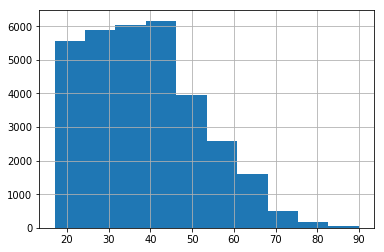

In [5]:
X = data.drop('income', axis=1)
Y = data['income']
print(X.head())
print(Y.head())

%matplotlib inline
data.age.hist()

In [6]:
# As we can se above, we may group our ages into 10 groups, from 10 to 10
age = tf.feature_column.numeric_column('age')
cAge = [tf.feature_column.bucketized_column(age, boundaries=[
    20, 30, 40, 50, 60, 70, 80, 90
])]

X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [9]:
# Spliting the Categorical Columns and creating a variable with all category in all columns
cColumnsNames = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'native-country'
]

cColumns = [tf.feature_column.categorical_column_with_vocabulary_list(
    key=key,
    vocabulary_list=X[key].unique()
) for key in cColumnsNames]

cColumns[0]

VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [10]:
# Doing the same with the numerical columns

nColumnsNames = [
    'final-weight', 'education-num','capital-gain', 'capital-loos', 'hour-per-week'
]

nColumns = [tf.feature_column.numeric_column(key=key) for key in nColumnsNames]

nColumns[0]

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [11]:
# And then, lets wrap all together
columns = cAge + cColumns + nColumns

In [12]:
# We will now creat the train and test data
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3)
print('Split: {0} for testing and {1} for trainning'.format(Xte.shape[0], Xtr.shape[0]))

Split: 9769 for testing and 22792 for trainning


In [13]:
## LOGISTIC REGRESSION

trainFunc = tf.estimator.inputs.pandas_input_fn(
    x=Xtr, y=Ytr, batch_size=32, num_epochs=None, shuffle=True
)
classifier = tf.estimator.LinearClassifier(feature_columns=columns)
classifier.train(input_fn=trainFunc, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgzeyn5f8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe3098142b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

INFO:tensorflow:loss = 5619.639, step = 5001 (0.317 sec)
INFO:tensorflow:global_step/sec: 306.512
INFO:tensorflow:loss = 6720.129, step = 5101 (0.328 sec)
INFO:tensorflow:global_step/sec: 277.374
INFO:tensorflow:loss = 544.31055, step = 5201 (0.359 sec)
INFO:tensorflow:global_step/sec: 303.409
INFO:tensorflow:loss = 2265.2979, step = 5301 (0.328 sec)
INFO:tensorflow:global_step/sec: 293.634
INFO:tensorflow:loss = 423.02234, step = 5401 (0.344 sec)
INFO:tensorflow:global_step/sec: 266.44
INFO:tensorflow:loss = 1231.2501, step = 5501 (0.377 sec)
INFO:tensorflow:global_step/sec: 272.631
INFO:tensorflow:loss = 1628.4021, step = 5601 (0.363 sec)
INFO:tensorflow:global_step/sec: 286.832
INFO:tensorflow:loss = 6837.6035, step = 5701 (0.346 sec)
INFO:tensorflow:global_step/sec: 266.847
INFO:tensorflow:loss = 3133.4614, step = 5801 (0.380 sec)
INFO:tensorflow:global_step/sec: 258.077
INFO:tensorflow:loss = 5429.2417, step = 5901 (0.386 sec)
INFO:tensorflow:global_step/sec: 279.789
INFO:tensorfl

In [15]:
predFunc = tf.estimator.inputs.pandas_input_fn(x=Xte, batch_size=32, shuffle=False)
predictions = classifier.predict(input_fn=predFunc)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpgzeyn5f8/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-32.551224], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1.000000e+00, 7.297652e-15], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([16.158094], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([9.607905e-08, 9.999999e-01], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.2990278], dtype=float32),
  'logistic': array([0.5742048], dtype=float32),
  'probabilities': array([0.42579517, 0.57420486], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-139.57869], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([4714.735], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'prob

In [23]:
listOfPredictions = list()
for p in classifier.predict(input_fn=predFunc):
    listOfPredictions.append(p['class_ids'])
    
from sklearn.metrics import accuracy_score

score = accuracy_score(Yte, listOfPredictions)
score

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgzeyn5f8/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.7946565666905517